In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib

from mpl_toolkits.mplot3d.axes3d import get_test_data

In [2]:
rho = np.array([[0.45,0.2-1j*0.3],[0.2+1j*0.3,0.55]])
e_val, e_vec = np.linalg.eigh(rho)
rho_inv = np.linalg.inv(rho)

In [3]:
QQ = (2*np.pi*e_val[0]*e_val[1])/(e_val[1]-e_val[0])*((np.exp(-1/(2*e_val[1])))-(np.exp(-1/(2*e_val[0]))))

In [7]:
p_plus, phi_plus = 0.568, 0.983
p_minus, phi_minus = 0.432, 4.124

In [8]:
X_plus = np.argmin(np.abs(X[0]-p_plus)**2)
X_minus = np.argmin(np.abs(X[0]-p_minus)**2)

Y_plus = np.argmin(np.abs(Y[:,0]-phi_plus)**2)
Y_minus = np.argmin(np.abs(Y[:,0]-phi_minus)**2)

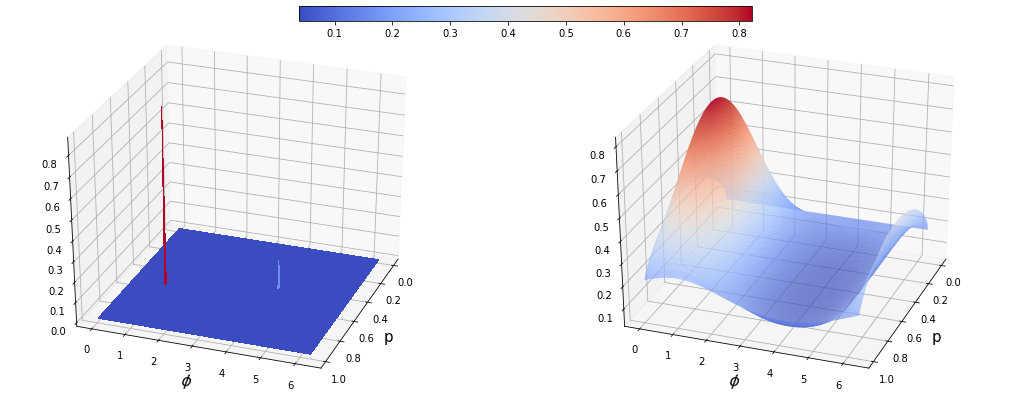

In [12]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(18,7))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 2*np.pi, 0.01)
X, Y = np.meshgrid(X, Y)
Z1 = np.zeros(X.shape)
Z1[Y_minus,X_minus], Z1[Y_plus,X_plus] = e_val[0], e_val[1]

surf2 = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=20, antialiased=False)

ax.set_xlabel("p",fontsize=15)
ax.set_ylabel("$\phi$",fontsize=15)
#ax.set_zlim(0, 10)
#fig.colorbar(surf2, shrink=0.5, aspect=10)
ax.view_init(30,20)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 2*np.pi, 0.01)
X, Y = np.meshgrid(X, Y)
R = (1-X)*np.real(rho_inv[0,0]) + X*np.real(rho_inv[0,0]) + np.sqrt(X*(1-X))*np.real(np.exp(-1j*Y)*rho_inv[1,0]+np.exp(1j*Y)*rho_inv[0,1])
Z = np.exp(-0.5*R)/QQ
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)

ax.set_xlabel("p",fontsize=15)
ax.set_ylabel("$\phi$",fontsize=15)
#ax.set_zlim(0, 10)
ax.view_init(30,20)
# where arg is [left, bottom, width, height]
cax = fig.add_axes([0.35, .87, 0.35, 0.03])
fig.colorbar(surf, orientation='horizontal', cax=cax)

plt.show()

In [34]:
int(e_val[0]*1000)

135

In [50]:
int(e_val[1]*1000)

864

In [53]:
size=1000
data = np.zeros((size,2))
data_x = np.zeros(size)
data_y = np.zeros(size)
for k in range(int(e_val[0]*size)):
    data[k,:]=(p_minus,phi_minus)
    data_x[k],data_y[k] = p_minus, phi_minus
for k in range(int(e_val[0]*size),size):
    data[k,:]=(p_plus,phi_plus)
    data_x[k],data_y[k] = p_plus, phi_plus

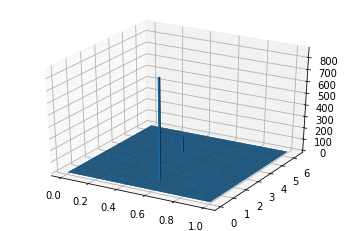

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data_x,data_y,bins=100,range=[[0, 1], [0, 2*np.pi]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5*(xedges[1]-xedges[0]), yedges[:-1] + 0.5*(yedges[1]-yedges[0]), indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = (xedges[1]-xedges[0])
dy = (yedges[1]-yedges[0])
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()